**César Antonio Hoyos Peláez**-
**1007328843**

**Tarea #10**

La idea de este laboratorio es hacer un desarrollo sobre redes neuronales convolucionales es especifico la red **LeNet5**

In [1]:
#@title Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras

**1. Cargas los datos de entrenamiento y test.**

En este caso se hace uso de una base de datos MNIST.MNIST que es un conjunto de datos clásico en el campo del aprendizaje automático, que tiene imagenes en blanco y negro, de números escritos del 0 al 9.

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

La primera tupla

```
X_train, y_train
```
representa las imágenes de entrenamiento y las etiquetas correspodientes a las imágenes, respectivamente. En el caso de denotar con test, significa imágenes de prueba.



In [3]:
# Veamos algo de informacion acerca de los datos
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Con base a lo anterior, se observa que los datos de entrenamiento X_train consiste de 60000 datos con imágenes de una dimensión de 28x28 cada una. Por otro lado, para testear el modelo se utilizarán 10000 imágenes.

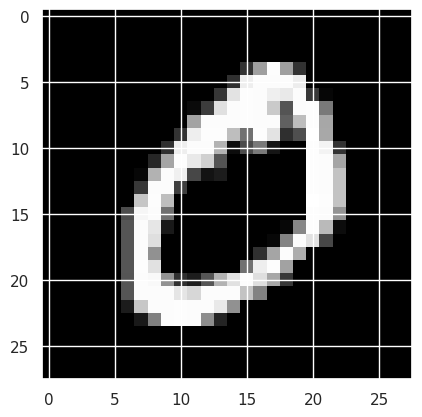

In [4]:
plt.imshow(X_train[1,:,:], cmap = 'gray') # ejemplo del tipo de imagen que se tiene

**2. Normalizar los datos.**

Se debe tener en cuenta que los datos a normalizar son los datos de entrenamiento y de testeo, es decir, X_train y X_test.

In [5]:
print(np.max(X_train[1,:,:]))
print(np.min(X_train[1,:,:]))

255
0


In [6]:
# Proceso de normalizar los datos
X_train = X_train/255.
X_test = X_test/255.

En este proceso, se pasan los datos de valores en el rango de (0, 255) a un rango de (0, 1). Esto se suele hacer por las siguientes razones:

1. Mejora la convergencia del algoritmo de entrenamiento.  
2. Reduce la variabilidad de las características.
3. Evita saturaciones y gradientes vanishing/exploding.

Aunque existen más razones, casi siempre el proceso de normalización se hace para que el calculo de los gradientes sea más suave.

**3. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary.**:

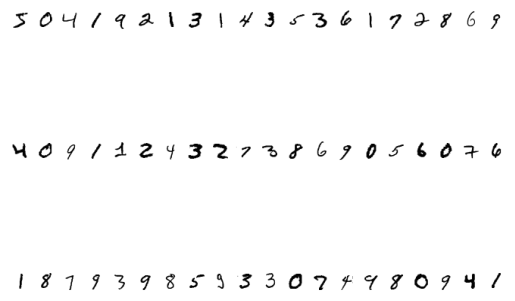

In [7]:
fig, ax = plt.subplots(3,20)
axs = ax.flatten()
for i in range(0,60):
  axs[i].imshow(X_train[i], cmap = "binary")
  axs[i].set_xticks([])
  axs[i].set_yticks([])

**4. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente**

![img](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/LeNet5.png?raw=true)


Par la implementación, se recomienda construir un modelo secuencial.


```python
keras.backend.clear_session()
models=keras.models.Sequential([...])

```

algunos parámetros que pueden ser pasados dentro de los tres puntos anteriores son:


```python
keras.layers.MaxPool2D,
keras.layers.Conv2D,
keras.layers.Flatten,
keras.layers.Dense
```

Revisa la documentación para pasar los valores adecuados.

In [8]:
# Implementar en keras la red LetNet5
keras.backend.clear_session()
models=keras.models.Sequential([keras.layers.Conv2D(6, (5,5), strides=1, padding='valid',activation="relu", input_shape=(28,28,1)),
                                keras.layers.AveragePooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Conv2D(16, (5,5), strides=1, activation="relu", padding='valid'),
                                keras.layers.AveragePooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Flatten(),
                                keras.layers.Dense(120,activation="relu"),
                                keras.layers.Dense(80,activation="relu"),
                                keras.layers.Dense(10,activation="softmax"),
                                ])

**5. Revise el modelo que acabaste de construir.**


In [9]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

Analicemos a detalle el modelo construido anteriormente.

Hay 3 conceptos importantes a la hora de realizar convolución:


1.   Dimensión del filtro.
2.   Padding. Este consiste en añadir capas adicionales de píxeles al rededor del borde de la imagen o del feature map lo cual permite mantener el tamaño espacial; hay dos tipos: 'valid' no se agrega padding y 'same' se agrega suficiente padding para que el tamaño de salida de la red sea el mismo que el de entrada.
3. Stride. Hace referencia a la cantidad de píxeles por los que se desplaza el filtro.

Dada una matriz de dimensiones $nxn$, convolucionada con una matriz $fxf$, definiendo un padding de $p$ y un stride de $s$ da:

\begin{equation}
  \boxed{dim = \frac{n + 2p - f}{s} + 1}
\end{equation}

La entrada a la red neuronal es una imagen de dimensiones $(28,28)$, las operaciones siguen el siguiente orden:



1. Sobre el input se aplican 6 filtros donde cada una tiene un de tamaño $(5,5)$, en donde el $stride = 1$ y el $padding = 'valid'$. Por tanto:

\begin{align}
  dim = \frac{28 - 5}{1} + 1 = 24
\end{align}

Por tanto, después de esta capa profunda se obtienen 6 imagenes cada una con dimension de $(24,24)$. Cabe aclarar que la cantidad de parámetros que se generan para optimizar cada bucle son $6x5x5 = 150$ a este se deben sumar los 6 filtros.
2.   La segunda capa de la red profunda hace un average polling, este se programo para ir variando en matrices $(2,2)$ y tomando el valor promedio de cada una de las 6 matrices que retornaron en el paso anterior.

\begin{align}
  dim = \frac{24 - 2}{2} + 1 = 12
\end{align}

Al final de esta capa se tienen 6 imágenes cada una con un tamaño de 12 por 12 píxeles.
3. Luego se procede a hacer otra capa convolucional, en donde se toman $16$ filtros cada uno con tamaño de $(5,5)$, el $stride = 1$ y el $padding = 'valid'$.

\begin{align}
  dim = \frac{12 - 5}{1} + 1 = 8
\end{align}

La salida de esta capa genera 16 imágenes cada una de tamaño $(8,8)$. La cantidad de parámetros a optimizar después de esta capa son $5^2$ proveniente del tamaño de cada filtro, $16$ de la cantidad de filtros nuevos, como cada uno de los 16 filtros se aplica sobre cada una de las matrices anteriores, entonces se debe multiplicar por 6. Así los parámetros a optimizar son: $5x5x16x6 = 2400$, a esto se le deben sumar los 16 filtros nuevos.

4. Luego, se vuelve a tomar un average polling. Este reduce la dimensión de cada una de las matrices a la mitad.

5. Luego, se toma aplica un flatten que lo que hace es aplanar los datos.

6. Finalmente, se aplican 3 capas densas en donde en cada una de ellas se aplica una función de activación especifica. Notese que la última capa debe tener la misma cantidad de las etiquetas que vienen dadas por y_train.





**6. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes anteriores para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.**



emplea el siguiente compilador del modelo
```python
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 ```

In [10]:
models.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**7. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.**


 ```python
 history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
```


- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.

In [11]:
history = models.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 31s 21ms/step - loss: 0.2798 - accuracy: 0.9164 - val_loss: 0.1244 - val_accuracy: 0.9624
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0907 - accuracy: 0.9717 - val_loss: 0.0780 - val_accuracy: 0.9762
Epoch 3/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.0627 - val_accuracy: 0.9801
Epoch 4/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 5/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 6/10
1313/1313 [==============================] - 22s 16ms/step - loss: 0.0331 - accuracy: 0.9890 - val_loss: 0.0507 - val_accuracy: 0.9861
Epoch 7/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0653 -

**8. Realiza la predicción:**
```python
q=model.predict(X_test)
```

In [12]:
q=models.predict(X_test)

313/313 [==============================] - 2s 5ms/step


**9. Muestra los valores de q y determina que numero se esta prediciendo.**

In [13]:
print(q.shape)

(10000, 10)


Recordemos que los datos para testear el modelo eran $10000$ y además por cada imagen para verificar nos esta dando 10 valores. Nos debemos quedar con el valor máximo.

El numero predecido por el modelo es: 6


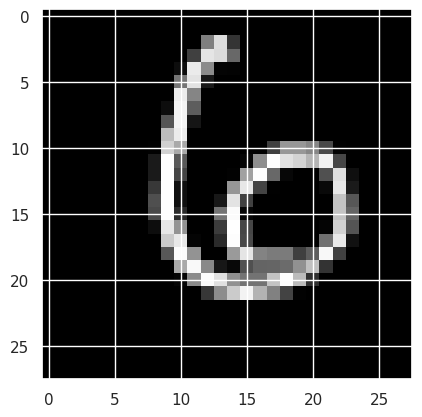

In [14]:
n = 100 # dato
print(f'El numero predecido por el modelo es: {np.argmax(q[n])}')
plt.imshow(X_test[n], cmap='gray' )

**10. Puede graficar la convergencia del modelo con los siguiente código**
```python
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()
```

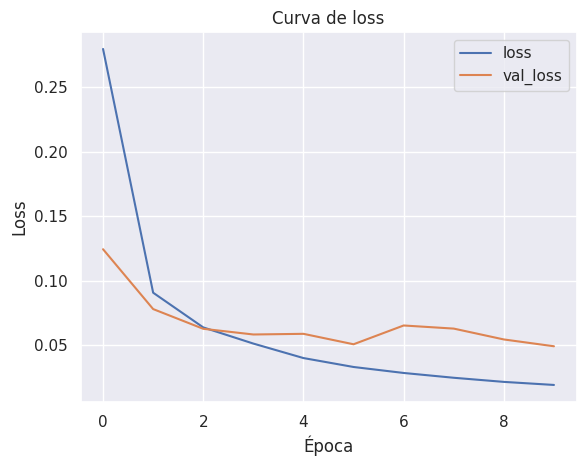

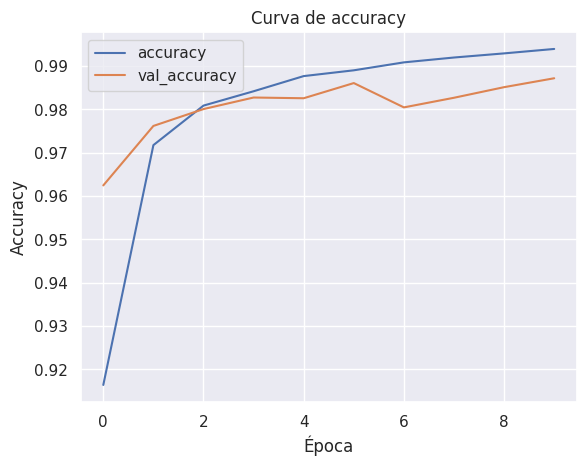

In [15]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()

**11. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:**



```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# X_train = X_train.reshape(60000,28,28,1)
# X_test = X_test.reshape(10000,28,28,1)
# input_shape = (28,28,1)
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# # model.add(Dropout(0.25))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# # model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(10, activation='softmax'))

**12. Emplea la arquitectura anterior para el dataset cifar100,  empleando BatchNormalization y dropout.**


- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.




```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')
```

intenta agregar, lineas como las siguientes en los lugares mas estrategicos:


```python
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()
```

(-0.5, 31.5, 31.5, -0.5)

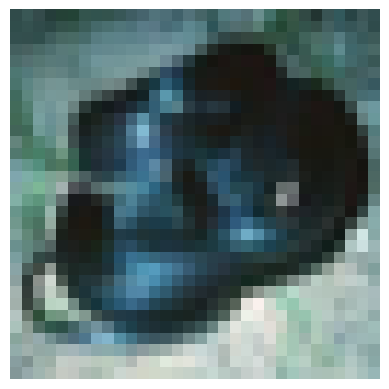

In [2]:
import seaborn as sns; sns.set()

(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

plt.imshow(train_image[40])
plt.axis('off')

In [3]:
print(np.shape(train_image)) # Nos dice que tenemos imagen RBG
print(np.shape(train_label)) # En este caso se tienen 100 imagenes a clasificar
print(np.shape(test_image))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


In [15]:
keras.backend.clear_session()
models2 =keras.models.Sequential([keras.layers.Conv2D(6, (5,5), strides=1, padding='valid',activation="relu", input_shape=(32,32,3)),
                                keras.layers.MaxPooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Dropout(0.25),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(16, (5,5), strides=1, activation="relu", padding='valid'),
                                keras.layers.MaxPooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Dropout(0.25),
                                keras.layers.Flatten(),

                                keras.layers.Dense(200,activation="relu"),

                                keras.layers.Dense(150,activation="relu"),

                                keras.layers.Dense(100,activation="softmax"), # Debe haber el minimo de las etiquetas que se usan
                                ])

In [16]:
models2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 batch_normalization (Batch  (None, 14, 14, 6)         24        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

**13. Emplea el siguiente compilador:**

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


```python
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo.

In [17]:
models2.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**15. Emplea early_stooping y realiza el fit**



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

In [18]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = models2.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])

Epoch 1/30
625/625 [==============================] - 44s 68ms/step - loss: 4.0059 - accuracy: 0.0918 - val_loss: 3.6652 - val_accuracy: 0.1372
Epoch 2/30
625/625 [==============================] - 33s 53ms/step - loss: 3.5461 - accuracy: 0.1580 - val_loss: 3.4593 - val_accuracy: 0.1754
Epoch 3/30
625/625 [==============================] - 33s 53ms/step - loss: 3.3477 - accuracy: 0.1932 - val_loss: 3.3362 - val_accuracy: 0.2008
Epoch 4/30
625/625 [==============================] - 33s 53ms/step - loss: 3.2299 - accuracy: 0.2154 - val_loss: 3.1719 - val_accuracy: 0.2286
Epoch 5/30
625/625 [==============================] - 36s 57ms/step - loss: 3.1289 - accuracy: 0.2328 - val_loss: 3.0872 - val_accuracy: 0.2426
Epoch 6/30
625/625 [==============================] - 33s 52ms/step - loss: 3.0604 - accuracy: 0.2476 - val_loss: 3.2785 - val_accuracy: 0.2097
Epoch 7/30
625/625 [==============================] - 33s 53ms/step - loss: 2.9949 - accuracy: 0.2591 - val_loss: 3.0316 - val_accuracy:

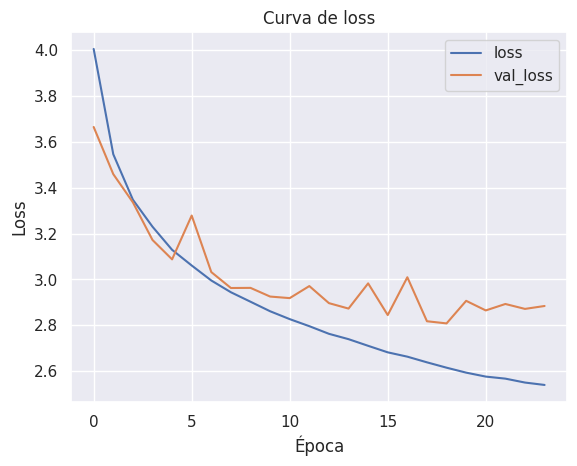

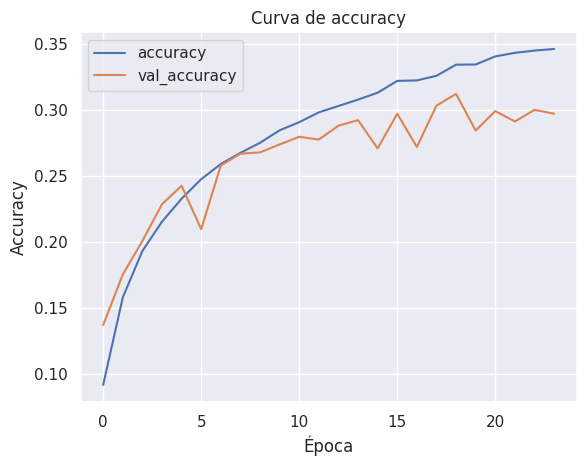

In [19]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()